In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
MoleculeList = [ '3B2' ,'RBD','HSA',  'HerA'] #, 'HSA', 'Her'
# MoleculeList = [ '3B2' ,'hGH','HSA',  'HerA']

Folder_List = {  '3B2': './3B2/Plates', 'hGH': './hGH/Plates',
               'RBD': './RBDJ/Plates', 'HerA': './HerA/Plates','HSA': './HSA/Plates'} #'HSA': '/HSA/Plates', 'Her': 'HSA/sHN10to23', 

Nr_list = { '3B2': [5], 'RBD': [5], 'HerA': [6], 'HSA': [4],'hGH':[6]} # 'Her': 'HSA/sHN10to23',

version = {'3B2': ['V5'], 'RBD': ['V5'], 'HerA': ['V6'], 'HSA': ['V4'], 'hGH':['V6']}

Strain_ID = {'3B2': [ 36, 37, 38, 39, 34,],  'RBD': [28,29,30,31, 26], 
            'HerA': [17, 22, 23, 20],
            'HSA': [3,8,9,0, 2], 'hGH': [45, 46, 47, 48,42]} #59,
cod_type = {}
for m in MoleculeList:
    cod_type[m] = ['IDT', 'GenScript','Azenta','Thermo', 'Pichia-CLM']
    
Data = {}
Data_Grouped = {}
for m in MoleculeList:
    Data[m] = {}
    Data_Grouped[m]= {}
    for r in Nr_list[m]:
        Data[m][r] = pd.read_excel(Folder_List[m]+"/Titer_OD_Plate.xlsx", version[m][0])
        Data_Grouped[m][r] = {}
        Uniq_Exp = Data[m][r].iloc[:,0].unique() 
        for i in Uniq_Exp:
            Data_Grouped[m][r][i] = Data[m][r].loc[Data[m][r].iloc[:,0] == i, :]

In [3]:
Property = ['Titer', 'Titer_D2', 'Titer_D3']
# Property = ['SP', 'SP_D2', 'SP_D3']

Avg = {}
Std = {}
Data_collect = {}


for m in MoleculeList:
    print(m)
    cnt_r = 0
    Avg[m] = {}
    Std[m] = {}
    for r in Nr_list[m]:
        if m == 'HerA':
            Avg[m][r] = np.zeros((len(Strain_ID[m])+1, len(Property)))
            Std[m][r] = np.zeros((len(Strain_ID[m])+1, len(Property)))
        else:
            Avg[m][r] = np.zeros((len(Strain_ID[m]), len(Property)))
            Std[m][r] = np.zeros((len(Strain_ID[m]), len(Property)))
        cnt_i = 0
        for i in Strain_ID[m]:
            Avg[m][r][cnt_i, :] = np.mean(Data_Grouped[m][r]['sHN'+str(i)][Property].values, axis = 0).reshape(1,-1)
            Std[m][r][cnt_i, :] = np.std(Data_Grouped[m][r]['sHN'+str(i)][Property].values, axis = 0).reshape(1,-1)
            cnt_i = cnt_i + 1
                
        if m == 'HerA': 
            Avg['HerA'][r][cnt_i, :] = np.mean(Data_Grouped['HerA'][r]['S1312'][Property].values, axis = 0).reshape(1,-1)
            Std['HerA'][r][cnt_i, :] = np.std(Data_Grouped['HerA'][r]['S1312'][Property].values, axis = 0).reshape(1,-1)
            
    cnt_r = cnt_r + 1

3B2
RBD
HSA
HerA


<Figure size 1296x288 with 0 Axes>

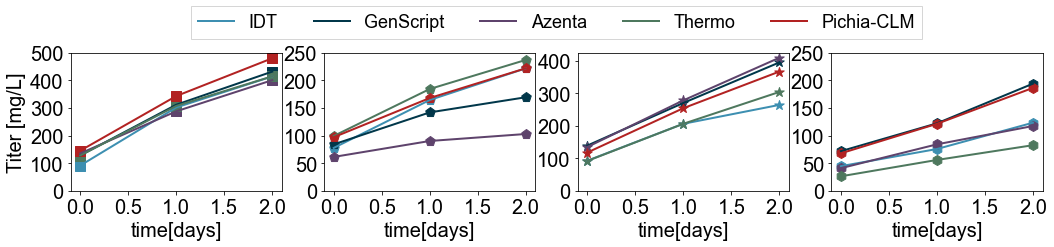

In [4]:
 #'gold', 'tab:green', 'tab:orange', 'tab:blue'
shapes = ['s', 'p', '*', 'h']
params = {'axes.titlesize': 20, 'xtick.labelsize': 20, 'ytick.labelsize': 20, 'axes.labelsize': 20}
hfont = {'fontname':'Arial'} #, 'weight' : 'bold'
plt.rcParams.update(params)
plt.rcParams["figure.figsize"] = (18, 4)
import matplotlib.font_manager as font_manager
font = font_manager.FontProperties(family='Arial',
                                   weight='normal',
                                style='normal', size=18)
plt.figure()
f, ax = plt.subplots(1,4, sharex= False, facecolor='w')
plt.gcf().subplots_adjust(bottom=0.4, left = 0.15)



for m in range(len(MoleculeList)):
    if MoleculeList[m] == 'HerA':
        c_name = [ '#3D8FB1', '#01374A','#5E436C', 'firebrick','#4E785E'] #IDT - '#777DB4',THermo- '#51645C'
        #Genescript - #3765A9
    else:
        c_name = [ '#3D8FB1', '#01374A','#5E436C','#4E785E', 'firebrick']
    cnt_r = 0
    for r in Nr_list[MoleculeList[m]]:
        Data_Plotting = pd.DataFrame(Avg[MoleculeList[m]][r]).T
        Std_Plotting = 3*pd.DataFrame(Std[MoleculeList[m]][r]).T
        for a in range(Data_Plotting.shape[1]):
            ax[m].plot(Data_Plotting.iloc[:,a], c = c_name[a], linewidth = 2)
#             ax.fill_between([0,1,2], Data_Plotting.iloc[:,a] - Std_Plotting.iloc[:,a], 
#                             Data_Plotting.iloc[:,a]+Std_Plotting.iloc[:,a], alpha=0.2, color = c_name[a])
        for a in range(Data_Plotting.shape[1]):
            ax[m].scatter([0,1,2], Data_Plotting.iloc[:,a], c = c_name[a], s = 100, marker = shapes[m])
        
        ax[0].legend(cod_type[MoleculeList[m]],  loc = "upper center",  bbox_to_anchor=(2.3, 1.4),
                  ncol=5, fancybox=False, shadow=False, fontsize = 18, prop = font)
        cnt_r = cnt_r + 1
        if m == 0:
            ax[m].set_yticks(np.arange(0,501,100))
            ax[m].set_yticklabels(np.arange(0,501,100), **hfont)
        elif m in [1, 3]:
            ax[m].set_yticks(np.arange(0,251,50))
            ax[m].set_yticklabels(np.arange(0,251,50), **hfont)
        elif m == 2:
            ax[m].set_yticks(np.arange(0,401,100))
            ax[m].set_yticklabels(np.arange(0,401,100), **hfont)
            
        ax[m].set_xticks(np.arange(0,2.1,0.5))
        ax[m].set_xticklabels(np.arange(0,2.1,0.5), **hfont)
        ax[m].set_xlabel("time[days]", **hfont)
        ax[0].set_ylabel("Titer [mg/L]", **hfont)
    
plt.savefig("./Plots/Dynamics/Dynamics.pdf", dpi = 600, bbox_inches = "tight")        